## Boilerplate

In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import json
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import torch

from pytorch_lightning.loggers.csv_logs import CSVLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint

In [3]:
def read_json(path):
    with open(path, 'r') as infile:
        dat = json.load(infile)
    return dat

def save_json(d, path, indent=4, sort_keys=True):
    """Saves a json file to the path specified.

    Parameters
    ----------
    d : dict
        Must be serializable.
    path : str
        File path to save at.
    """

    with open(path, 'w') as outfile:
        json.dump(d, outfile, indent=indent, sort_keys=sort_keys)

In [4]:
class NullClass:
    def do_nothing(*args, **kwargs):
        pass
    def add_colorbar(self, im, **kwargs):
        return plt.colorbar(im)
    def __getattr__(self, _):
        return self.do_nothing
try:
    from mpl_utils import MPLAdjutant
    adj = MPLAdjutant()
    adj.set_defaults()
except ImportError:
    adj = NullClass()

In [5]:
import os

os.chdir('../..')

# Loading in Data

In [6]:
from gale.ml import LightningMultiLayerPerceptron, Data, Trainer, LightningAutoencoder

In [7]:
data = pickle.load(open("/Users/aghose/Desktop/BNL2022/Data/22_QM9_forward/XANES-220531-data-O-ACSF-small.pkl", "rb"))

In [8]:
np.random.seed(1234)
torch.manual_seed(1234)
x_train, x_val, y_train, y_val = train_test_split(
    data["x"], data["y"], test_size=0.1, random_state=42
)

In [9]:
loader = Data(x_train, y_train, x_val, y_val)

## Setting up Random Model Architecture

In [10]:
logger = CSVLogger("notebooks/ensemble/logs", name="4444")
checkpointer = ModelCheckpoint(dirpath="notebooks/ensemble/logs/test/model01", save_top_k=5, monitor="val_loss")
early_stopper = EarlyStopping(
    monitor="val_loss",
    check_finite=True,
    patience=50,
    verbose=False,
)

In [11]:
model = LightningMultiLayerPerceptron(input_size=x_train.shape[1], hidden_sizes = [39,40],  output_size=y_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    patience=100,
    min_lr=1e-7,
    factor=0.95,
)
scheduler_kwargs = {"monitor": "val_loss"}
model.set_optimizer(optimizer, scheduler, scheduler_kwargs)

## Training

In [12]:
trainer = Trainer(
    gpus=0,
    num_nodes=1,
    auto_select_gpus=False,
    precision=32,
    max_epochs=200,
    enable_progress_bar=True,
    log_every_n_steps=1,
    logger=logger,
    callbacks=[checkpointer, early_stopper],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [13]:
trainer.fit(model, loader)

/Users/aghose/Desktop/BNL2022/Venv/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: UserWarning: Checkpoint directory /Users/aghose/Desktop/BNL2022/GALE/notebooks/ensemble/logs/test/model01 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name      | Type                     | Params
-------------------------------------------------------
0 | _model    | FeedForwardNeuralNetwork | 16.0 K
1 | criterion | MSELoss                  | 0     
-------------------------------------------------------
16.0 K    Trainable params
0         Non-trainable params
16.0 K    Total params
0.064     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Early stopping criteria reached at epoch 167/200


In [15]:
trainer.export_csv_log()

## Plotting Loss over Epochs

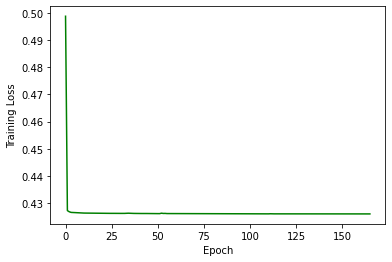

In [16]:
import matplotlib.pyplot as plt
import pandas as pd




# Load data
results = pd.read_csv('notebooks/ensemble/logs/4444/version_3/custom_metrics.csv')

# Plot
plt.plot(results['epoch'], results['train_loss'],color='green')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

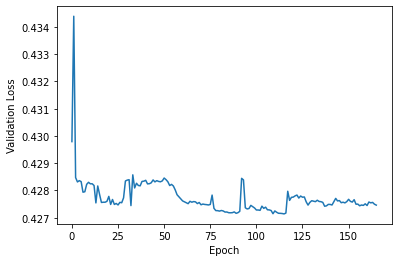

In [17]:
plt.plot(results['epoch'], results['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [ ]:
#model architecture
print(model)

## Predictions

In [18]:
model.eval()
predictions = model(torch.FloatTensor(x_val))
preds = predictions.detach().numpy()

In [ ]:
# print(predictions)
#print("Predicted: ", predictions[0],"\nTrue: ", y_val[0])

In [20]:
#printing minimum loss value
print("min_loss = ", min(results['val_loss']))

min_loss =  0.4270925223827362


## PCA Plot and Error Plots

In [19]:
from matplotlib import cm

grid = data['grid']
acsf_array = data['x']
spectra = data['y']

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pca_acsf = PCA(2)
w_acsf = pca_acsf.fit_transform(acsf_array)

pca_spectra = PCA(2)
w_spectra = pca_spectra.fit_transform(spectra)

# print(w_spectra.shape)
# print(w_acsf.shape)

N = 10
M = 100

dig = np.digitize(w_acsf[::N, 0], bins=np.linspace(w_acsf[::N, 0].min(), w_acsf[::N, 0].max(), M))
cmap = cm.get_cmap("rainbow", M)

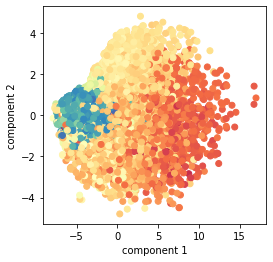

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(w_acsf[:, 0], w_acsf[:, 1],  c=w_spectra[:, 0], cmap=plt.cm.get_cmap('Spectral'))

ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
plt.show()

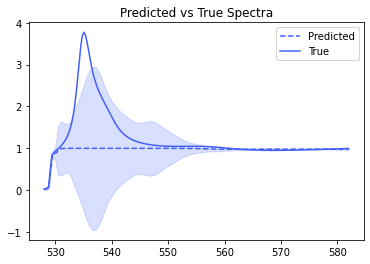

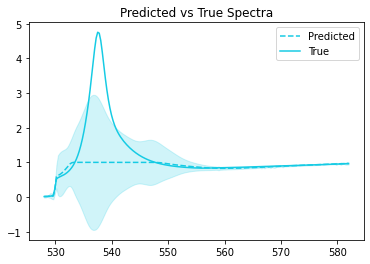

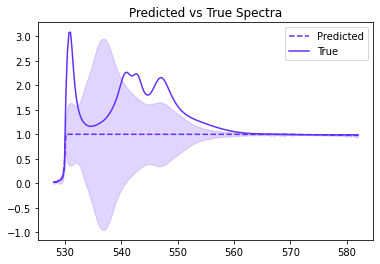

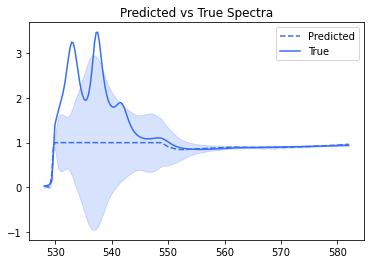

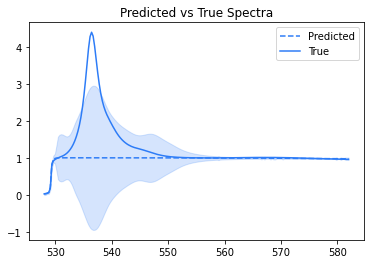

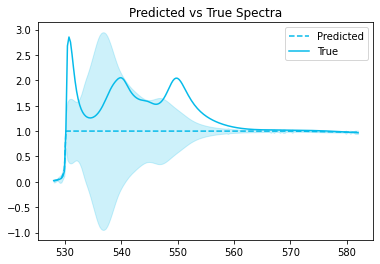

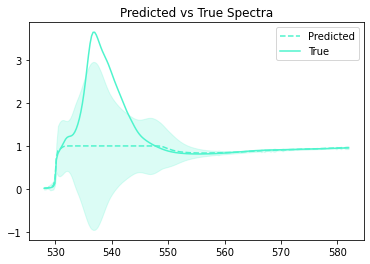

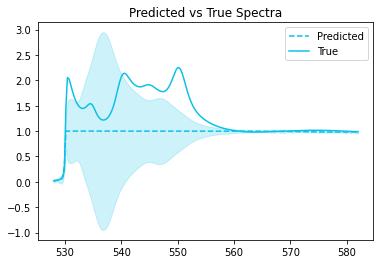

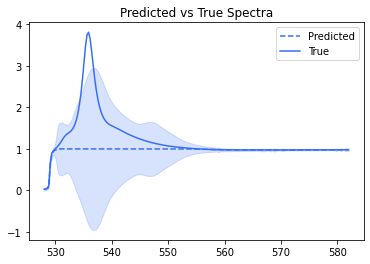

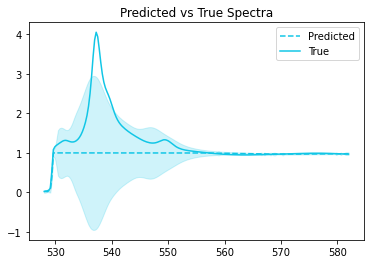

In [22]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(preds, y_val, multioutput = 'raw_values')

rmse = [math.sqrt(mse[i]) for i in range(len(mse))]
for i in range(10):
    fig1, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    
    
    ax1.plot(grid, preds[i], color=cmap(dig[i]), linestyle = 'dashed', label = "Predicted")

    ax1.plot(grid, y_val[i], color=cmap(dig[i]), label = "True")
    ax1.legend(loc="upper right")
    ax1.set_title("Predicted vs True Spectra")
    plt.fill_between(grid, preds[i] -1 * rmse,preds[i] +1 * rmse, color=cmap(dig[i]), alpha = 0.2)
    
    # errorbar(grid, y_val[i], yerr= mse, color = cmap(dig[i]), alpha = 0.5)
    plt.show()